# 4. 역전파

## 4.2 그레디언트 텐서

In [1]:
# 라이브러리 불러오기
import torch

인공신경망의 최적화는 손실함수(Loss Function)의 최솟값(Global Minimum)을 나오게 하는 것

기울기가 크면 크게 줄이고, 기울기가 작으면 작게 줄여서 최솟값을 찾아가는 과정  
파이토치는 이런 계산을 자동으로 해준다.  
합성함수를 미분

In [2]:
# requires_grad=True는 해당 텐서를 기준으로 모든 연산들을 추적할 수 있게 하는 옵션
# 즉, x에 대해서 연쇄 법칙을 이용한 미분이 가능하다는 것
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [4]:
# y는 x에 대한 식, z는 y에 대한 식, res는 z에 대한 식이다. 따라서 이는 합성함수의 개념으로써 x에 대해서 표현 및 미분이 가능하다.
y = x+1
z = 2*y**2
r = z.mean()
print("y: ", y)
print("z: ", z)
print("Result: ", r)
# grad_fn=..은 추적이 잘 되고 있다는 의미다.

y:  tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
z:  tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)
Result:  tensor(8., grad_fn=<MeanBackward0>)


In [5]:
r.backward() # res를 기준으로 역전파를 진행

# 역으로 식을 써내려 가보자.
# r = (z_1 + z_2 + z_3 +z_4)/4
# z_i = 2 y_i **2
# z_i = 2(x_i+1)**2
# d(res)/dx_i = x_i + 1


In [6]:
print(x)
print(x.grad) 
# x.grad는 backward()가 선언 된 변수를 기준으로 미분을 한다. 즉 d(res)/dx를 계산한다.
# #d(res)/dx_i = x_i + 1

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]])


# 4. 파이토치 기본
## 4.2 역전파 - 선형회귀식

In [8]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 6.8 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.3 MB/s eta 0:00:00a 0:00:01m
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.3 MB/s eta 0:00:00a 0:00:01


In [9]:
import torch
from matplotlib import pyplot as plt

In [11]:
x = torch.FloatTensor(range(5)).unsqueeze(1) # range(5) 형태로 float 형태를 만듬. 원래는 1차원의 [0, 1, 2, 3, 4] 라 2차원으로 바꿈. unsqueeze(1)은 1개 위의 차원으로 바꿔줌
y = 2*x + torch.rand(5,1) # 

print(x)
print(y)
num_features = x.shape[1] #5행 1열이라 변수(열의 개수와 같음)은 1개

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[0.9702],
        [2.1198],
        [4.0419],
        [6.9766],
        [8.0802]])


In [15]:
x.shape[1]

1

In [16]:
print(x.shape, y.shape) #x는 

torch.Size([5, 1]) torch.Size([5, 1])


In [17]:
#dtype = torch.FloatTensor
#W = Variable(torch.randn(num_features, 1), requires_grad=True)
#b = Variable(torch.randn(1), requires_grad=True)
w = torch.randn(num_features, 1, requires_grad=True) # 가중치(기울기)
b = torch.randn(1, requires_grad=True) #일단 편향은 1, 모든 인스턴스에 동일한 것을 더해야함

In [18]:
print(w)
print(b)

tensor([[0.2710]], requires_grad=True)
tensor([-1.0895], requires_grad=True)


In [21]:
learning_rate = 1e-3 #Gradient에 곱해야할 학습률
optimizer = torch.optim.SGD([w, b], lr=learning_rate) # 

In [19]:
print(w.shape, b.shape)

torch.Size([1, 1]) torch.Size([1])


In [22]:
loss_stack = [] #Loss function을 저장할 리스트
for epoch in range(1001): #반복학습 수 1001
    
    optimizer.zero_grad() # 미분값이 누적되기 때문에 epoch 마다 누적된 계산값을 초기화해야함
    
    y_hat = torch.matmul(x, w) + b #mat_mul=> 합성곱 [5,1]*[1, 1]
    loss = torch.mean((y_hat-y)**2) #Mean squared error
    
    loss.backward() # 역전파 
    optimizer.step() # 미리 정의한 Optimizer를 통한 최적화
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:30.385034561157227
Epoch 100:2.4898219108581543
Epoch 200:0.5810116529464722
Epoch 300:0.4243863523006439
Epoch 400:0.3888370394706726
Epoch 500:0.3642498850822449
Epoch 600:0.342898428440094
Epoch 700:0.32398203015327454
Epoch 800:0.30719679594039917
Epoch 900:0.29230087995529175
Epoch 1000:0.2790815234184265


In [23]:
with torch.no_grad(): # 구문 내부에 있는 requires_grad가 작동하지 않도록
    y_hat = torch.matmul(x, w) + b

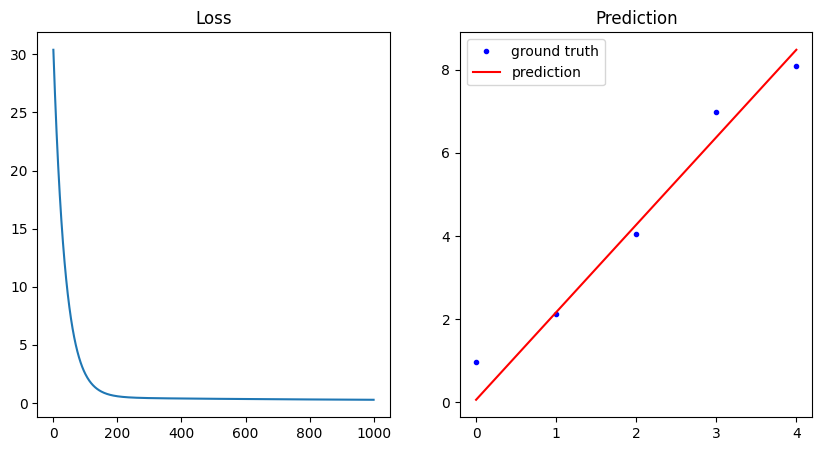

In [24]:
#시각화
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()